In [26]:

import pandas as pd



In [27]:
p_day=7

In [28]:
df=pd.read_csv("INFY.csv")
df.dtypes

Unnamed: 0     object
Open          float64
High          float64
Low           float64
Close         float64
Adj Close     float64
Volume          int64
dtype: object

In [29]:
len(df)

3450

In [30]:
df.tail()


,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
3445,2021-09-24 13:15:00+05:30,1766.800049,1772.949951,1766.599976,1767.75,1771.699951,667263
3446,2021-09-24 14:15:00+05:30,1771.699951,1772.500000,1760.150024,1768.90,1764.400024,1200835
3447,2021-09-24 15:15:00+05:30,1764.400024,1766.000000,1763.000000,1771.70,1764.099976,535790
3448,2021-09-27 09:15:00+05:30,1759.699951,1768.750000,1738.750000,1778.10,1741.550049,1168663
3449,2021-09-27 10:14:14+05:30,1742.349976,1742.349976,1742.349976,1779.90,1742.349976,0


In [31]:
df1=df.reset_index()['Close']

In [32]:
df1.dropna()

0        524.20
1        527.80
2        528.00
3        529.15
4        530.15
         ...   
3445    1767.75
3446    1768.90
3447    1771.70
3448    1778.10
3449    1779.90
Name: Close, Length: 3450, dtype: float64

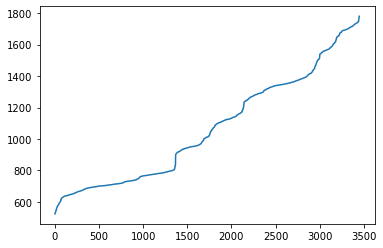

In [33]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [34]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [35]:
import numpy as np

In [36]:
df1

0        524.20
1        527.80
2        528.00
3        529.15
4        530.15
         ...   
3445    1767.75
3446    1768.90
3447    1771.70
3448    1778.10
3449    1779.90
Name: Close, Length: 3450, dtype: float64

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [38]:
print(df1)

[[0.        ]
 [0.00286693]
 [0.0030262 ]
 ...
 [0.99346978]
 [0.99856654]
 [1.        ]]


In [39]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [40]:
training_size,test_size

(2242, 1208)

In [41]:
train_data

array([[0.        ],
       [0.00286693],
       [0.0030262 ],
       ...,
       [0.59460858],
       [0.59472804],
       [0.59588277]])

In [42]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [43]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = p_day
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [44]:
print(X_train.shape), print(y_train.shape)

(2234, 7)
(2234,)


(None, None)

In [45]:
print(X_test.shape), print(ytest.shape)

(1200, 7)
(1200,)


(None, None)

In [46]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [47]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [48]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(p_day,1)))
model.add(Dropout(0.5))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(50))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 7, 50)             10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)               

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=350,batch_size=10,verbose=2)

Epoch 1/350
224/224 - 11s - loss: 0.0074 - val_loss: 1.6413e-04
Epoch 2/350
224/224 - 3s - loss: 0.0024 - val_loss: 9.2707e-04
Epoch 3/350
224/224 - 3s - loss: 0.0020 - val_loss: 6.4994e-04
Epoch 4/350
224/224 - 3s - loss: 0.0016 - val_loss: 0.0175
Epoch 5/350
224/224 - 3s - loss: 0.0015 - val_loss: 0.0020
Epoch 6/350
224/224 - 3s - loss: 0.0013 - val_loss: 8.1919e-04
Epoch 7/350
224/224 - 2s - loss: 0.0013 - val_loss: 0.0019
Epoch 8/350
224/224 - 2s - loss: 0.0011 - val_loss: 0.0023
Epoch 9/350
224/224 - 2s - loss: 0.0011 - val_loss: 0.0033
Epoch 10/350
224/224 - 2s - loss: 9.6229e-04 - val_loss: 0.0112
Epoch 11/350
224/224 - 2s - loss: 9.4170e-04 - val_loss: 0.0067
Epoch 12/350
224/224 - 2s - loss: 8.5031e-04 - val_loss: 0.0043
Epoch 13/350
224/224 - 2s - loss: 9.2137e-04 - val_loss: 0.0081
Epoch 14/350
224/224 - 2s - loss: 9.2074e-04 - val_loss: 0.0028
Epoch 15/350
224/224 - 2s - loss: 9.0627e-04 - val_loss: 0.0038
Epoch 16/350
224/224 - 2s - loss: 8.4192e-04 - val_loss: 0.0092
Epoc

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=p_day
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot,color="red")
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[len(test_data)-p_day-1:].reshape(1,-1)
x_input.shape


In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
len(temp_input)

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=p_day
futureDays=70
i=0

while(i<futureDays):
    
    if(len(temp_input)>p_day):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,futureDays+1)
day_pred=np.arange(p_day+1,p_day+1+futureDays)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-futureDays:]),color="red")
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)


plt.plot(df3[len(df1)-365:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
df4 = pd.DataFrame(df3,columns =['Close'])
df4


In [ ]:
plt.plot(df4["Close"][5:])
plt.show()

In [ ]:

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error